In [1]:
import warnings
warnings.filterwarnings('ignore')

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
path = 'yelp_data/health_text_sentiment.csv'

df = pd.read_csv(path)
df.drop(['Unnamed: 0'],axis=1,inplace=True)

data = df[['stars','text','clean_text']]

In [4]:
data.head()

,stars,text,clean_text
0,1,Please stay away from this place if you can! I...,please stay away place bad care imaginable sta...
1,5,My husband has been a patient of Dr. Byrne for...,husband patient dr byrne last year half last m...
2,4,Dr. Byrne is a great doctor! She has great bed...,dr byrne great doctor great bed side manner ex...
3,3,I'm raising my review as Dr Bryne's has been m...,raise review dr bryne receptive daughter go an...
4,1,I wish I could give 0 stars. Worst office I've...,wish could give star bad office ever horrible ...


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64006 entries, 0 to 64005
Data columns (total 3 columns):
stars         64006 non-null int64
text          64006 non-null object
clean_text    64006 non-null object
dtypes: int64(1), object(2)
memory usage: 1.5+ MB


In [ ]:
category_to_id = dict(category_id_df.values)


## Select only 1 & 5 stars

In [ ]:
data = data.ix[np.where((data.stars==1)|(data.stars==5))]
data.stars.replace(1,0,inplace=True)
data.stars.replace(5,1,inplace=True)
data.head()

# Multinomial NB


In [6]:
data.head()

,stars,text,clean_text
0,1,Please stay away from this place if you can! I...,please stay away place bad care imaginable sta...
1,5,My husband has been a patient of Dr. Byrne for...,husband patient dr byrne last year half last m...
2,4,Dr. Byrne is a great doctor! She has great bed...,dr byrne great doctor great bed side manner ex...
3,3,I'm raising my review as Dr Bryne's has been m...,raise review dr bryne receptive daughter go an...
4,1,I wish I could give 0 stars. Worst office I've...,wish could give star bad office ever horrible ...


In [7]:
test = data.loc[:100]

In [8]:
test.head()

,stars,text,clean_text
0,1,Please stay away from this place if you can! I...,please stay away place bad care imaginable sta...
1,5,My husband has been a patient of Dr. Byrne for...,husband patient dr byrne last year half last m...
2,4,Dr. Byrne is a great doctor! She has great bed...,dr byrne great doctor great bed side manner ex...
3,3,I'm raising my review as Dr Bryne's has been m...,raise review dr bryne receptive daughter go an...
4,1,I wish I could give 0 stars. Worst office I've...,wish could give star bad office ever horrible ...


In [41]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

# features = tfidf.fit_transform(test.text).toarray()
# labels = test.stars

features = tfidf.fit_transform(data.text).toarray()
labels = data.stars

In [42]:
len(features)

64006

In [43]:
len(labels)

64006

In [ ]:
#https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/Consumer_complaints.ipynb

## Model comparison




```
CPU times: user 1h 14min 22s, sys: 5h 58min 49s, total: 7h 13min 11s
Wall time: 7h 3min 34s
```

In [37]:
# %%time
# from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.feature_extraction.text import TfidfTransformer
# from sklearn.naive_bayes import MultinomialNB

# X_train, X_test, y_train, y_test = train_test_split(test['text'], test['stars'], random_state = 0)
# count_vect = CountVectorizer()
# X_train_counts = count_vect.fit_transform(X_train)
# tfidf_transformer = TfidfTransformer()
# X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

# clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [45]:
%%time
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

CPU times: user 1h 14min 22s, sys: 5h 58min 49s, total: 7h 13min 11s
Wall time: 7h 3min 34s


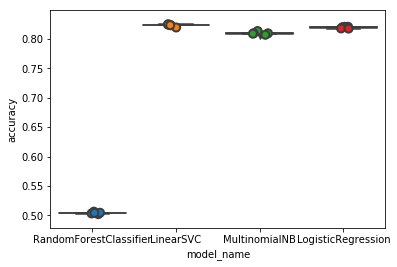

In [46]:
import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [48]:
cv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
model_name    20 non-null object
fold_idx      20 non-null int64
accuracy      20 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 560.0+ bytes


In [49]:
cv_df.head()

,model_name,fold_idx,accuracy
0,RandomForestClassifier,0,0.502187
1,RandomForestClassifier,1,0.506445
2,RandomForestClassifier,2,0.503398
3,RandomForestClassifier,3,0.504609
4,RandomForestClassifier,4,0.504453


In [50]:
cv_df.to_csv('yelp_data/health_text_model_results.csv')

In [47]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.823266
LogisticRegression        0.819470
MultinomialNB             0.809877
RandomForestClassifier    0.504218
Name: accuracy, dtype: float64

In [52]:
cv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
model_name    20 non-null object
fold_idx      20 non-null int64
accuracy      20 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 560.0+ bytes


In [77]:
cv_models = cv_df.copy()

In [78]:
cv_models

,model_name,fold_idx,accuracy
0,RandomForestClassifier,0,0.502187
1,RandomForestClassifier,1,0.506445
2,RandomForestClassifier,2,0.503398
3,RandomForestClassifier,3,0.504609
4,RandomForestClassifier,4,0.504453
5,LinearSVC,0,0.824586
6,LinearSVC,1,0.823529
7,LinearSVC,2,0.825092
8,LinearSVC,3,0.819609
9,LinearSVC,4,0.823516


In [79]:
cv_models.fold_idx.replace(4,5,inplace=True)

In [81]:
cv_models.fold_idx.replace(3,4,inplace=True)

In [83]:
cv_models.fold_idx.replace(2,3,inplace=True)

In [85]:
cv_models.fold_idx.replace(1,2,inplace=True)

In [87]:
cv_models.fold_idx.replace(0,1,inplace=True)

In [88]:
cv_models

,model_name,fold_idx,accuracy
0,RandomForestClassifier,1,0.502187
1,RandomForestClassifier,2,0.506445
2,RandomForestClassifier,3,0.503398
3,RandomForestClassifier,4,0.504609
4,RandomForestClassifier,5,0.504453
5,LinearSVC,1,0.824586
6,LinearSVC,2,0.823529
7,LinearSVC,3,0.825092
8,LinearSVC,4,0.819609
9,LinearSVC,5,0.823516


In [75]:
cv_models.fold_idx.replace(0,1,inplace=True)
cv_models.fold_idx.replace(1,2,inplace=True)
cv_models.fold_idx.replace(2,3,inplace=True)
cv_models.fold_idx.replace(3,4,inplace=True)
cv_models.fold_idx.replace(4,5,inplace=True)

In [76]:
cv_models

,model_name,fold_idx,accuracy
0,RandomForestClassifier,5,0.502187
1,RandomForestClassifier,5,0.506445
2,RandomForestClassifier,5,0.503398
3,RandomForestClassifier,5,0.504609
4,RandomForestClassifier,5,0.504453
5,LinearSVC,5,0.824586
6,LinearSVC,5,0.823529
7,LinearSVC,5,0.825092
8,LinearSVC,5,0.819609
9,LinearSVC,5,0.823516


,model_name,fold_idx,accuracy
0,RandomForestClassifier,0,0.502187
1,RandomForestClassifier,1,0.506445
2,RandomForestClassifier,2,0.503398
3,RandomForestClassifier,3,0.504609
4,RandomForestClassifier,4,0.504453
5,LinearSVC,0,0.824586
6,LinearSVC,1,0.823529
7,LinearSVC,2,0.825092
8,LinearSVC,3,0.819609
9,LinearSVC,4,0.823516


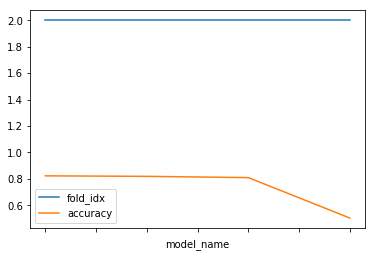

In [59]:
cv_df.groupby('model_name').mean().plot()

In [63]:
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


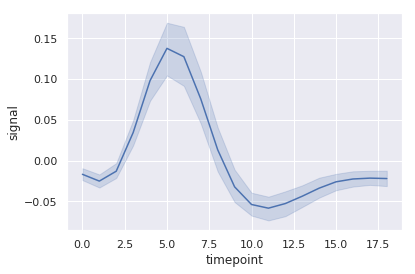

In [60]:
>>> import seaborn as sns; sns.set()
>>> import matplotlib.pyplot as plt
>>> fmri = sns.load_dataset("fmri")
>>> ax = sns.lineplot(x="timepoint", y="signal", data=fmri)

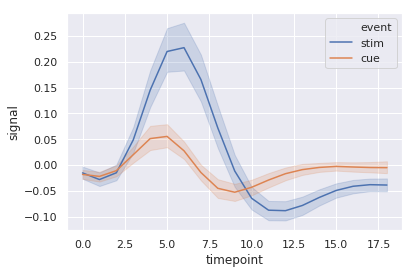

In [61]:
>>> ax = sns.lineplot(x="timepoint", y="signal", hue="event",
...                   data=fmri)

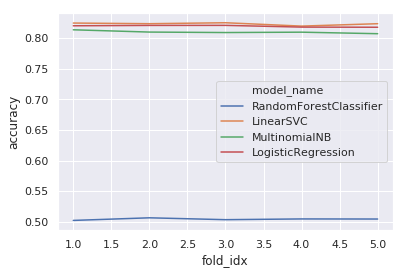

In [89]:
>>> ax = sns.lineplot(x="fold_idx", y="accuracy", hue="model_name",
...                   data=cv_models)

In [90]:
new = cv_models.loc[5:]

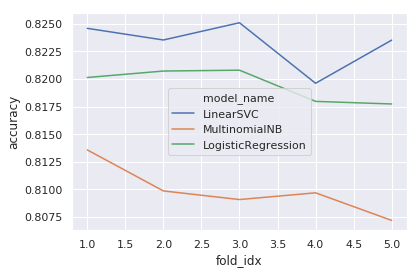

In [91]:
>>> ax = sns.lineplot(x="fold_idx", y="accuracy", hue="model_name",
...                   data=new)

In [ ]:
from sklearn.model_selection import train_test_split

model = LinearSVC()

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)